In [203]:
import pandas as pd
import numpy as np

In [204]:
df_all = pd.read_csv("D:\\datapool\\cs-training.csv")

df_all["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_U"] = df_all["SeriousDlqin2yrs"]
df_all.loc[df_all["test_cat1"] == "0_test","test_cat1"] = np.nan
df_all.loc[df_all["test_cat2"] == "0_test","test_cat2"] = np.nan
df_all.loc[df_all["test_cat3"] == "0_test","test_cat3"] = np.nan


df_train = df_all.sample(frac = 0.7)
df_test = df_all[df_all.index.isin(df_train.index) == False]

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

x_test = df_test.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
#y_column = u'SeriousDlqin2yrs'
y_test = df_test[u'SeriousDlqin2yrs']


In [214]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

#ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:84: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


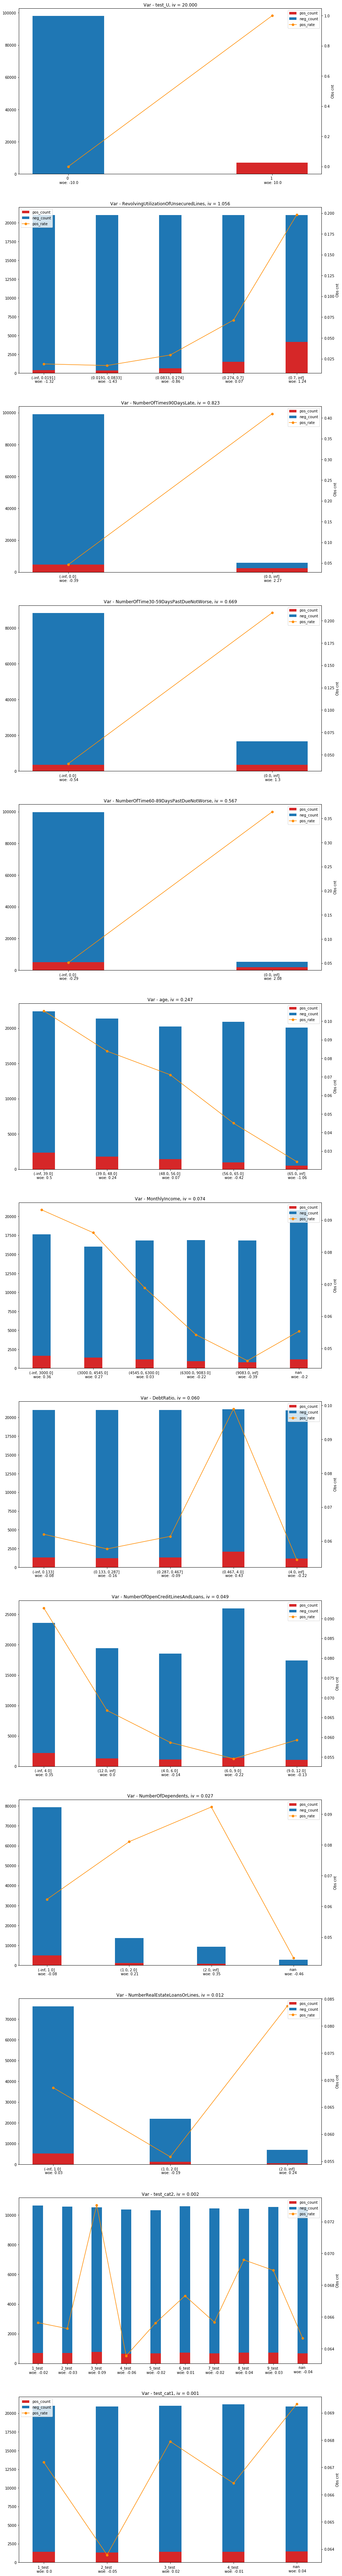

In [215]:
ximu.gen_woe_iv_plot()

In [216]:
ximu.get_woe_replaced_df()

<name>.df_woe_replaced, <name>.df_binned available


In [217]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2"
                    ,"NumberRealEstateLoansOrLines","NumberOfOpenCreditLinesAndLoans"]
ximu.gen_model(excluded_columns = excluded_columns)

Optimization terminated successfully.
         Current function value: 0.185582
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Sep 2017   Pseudo R-squ.:                  0.2445
Time:                        09:36:08   Log-Likelihood:                -19486.
converged:                       True   LL-Null:                       -25791.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.6923      0.0

In [218]:
#需要变形
df_binned_test,df_woe_replaced_test = ximu.get_woe_replaced_df(x_test)

In [219]:
ximu.gen_score()

base_odds:  0.0717347813661
reverse_base_odds:  13.9402390438
base_rt:  20
base_score:  600
p:  28.8539008178
q:  523.976332094
DebtRatio
MonthlyIncome
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
__intercept
count    105000.000000
mean        620.202726
std          34.081517
min         478.873387
25%         601.606622
50%         629.328153
75%         645.685771
max         662.777133
Name: final_score, dtype: float64
<name>.df_scored, <name>.woe_t_scored available


In [220]:
x_scored_test = ximu.gen_score(x_test)

base_odds:  0.0717347813661
reverse_base_odds:  13.9402390438
base_rt:  20
base_score:  600
p:  28.8539008178
q:  523.976332094
DebtRatio
MonthlyIncome
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
__intercept
count    45000.000000
mean       620.317738
std         33.821970
min        478.873387
25%        601.797895
50%        629.456566
75%        645.323163
max        662.662698
Name: final_score, dtype: float64


ROC-(AUC = 0.85)
ROC_TEST-(AUC = 0.85)
ks_value: 0.55
ks_position 6.0


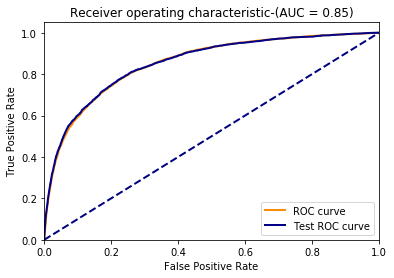

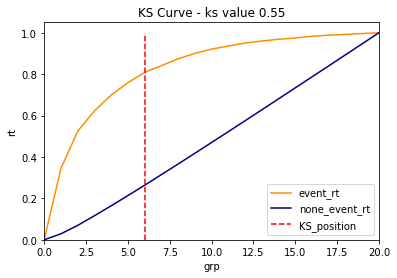

In [221]:
ximu.model_evaluate(x_test,y_test)

In [222]:
df_woe_replaced_test.columns

Index([u'test_cat1', u'NumberOfOpenCreditLinesAndLoans',
       u'NumberRealEstateLoansOrLines', u'age', u'DebtRatio',
       u'NumberOfDependents', u'MonthlyIncome', u'test_U',
       u'RevolvingUtilizationOfUnsecuredLines', u'test_cat2',
       u'NumberOfTime30-59DaysPastDueNotWorse',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfTimes90DaysLate'],
      dtype='object')

In [160]:
ximu.df_woe_replaced.corr().to_excel("corr.xlsx")

In [152]:
print plt.plot.__doc__

Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specified, as in::

    a.plot(x1, y1, 'g^', x2, y2, 'g-

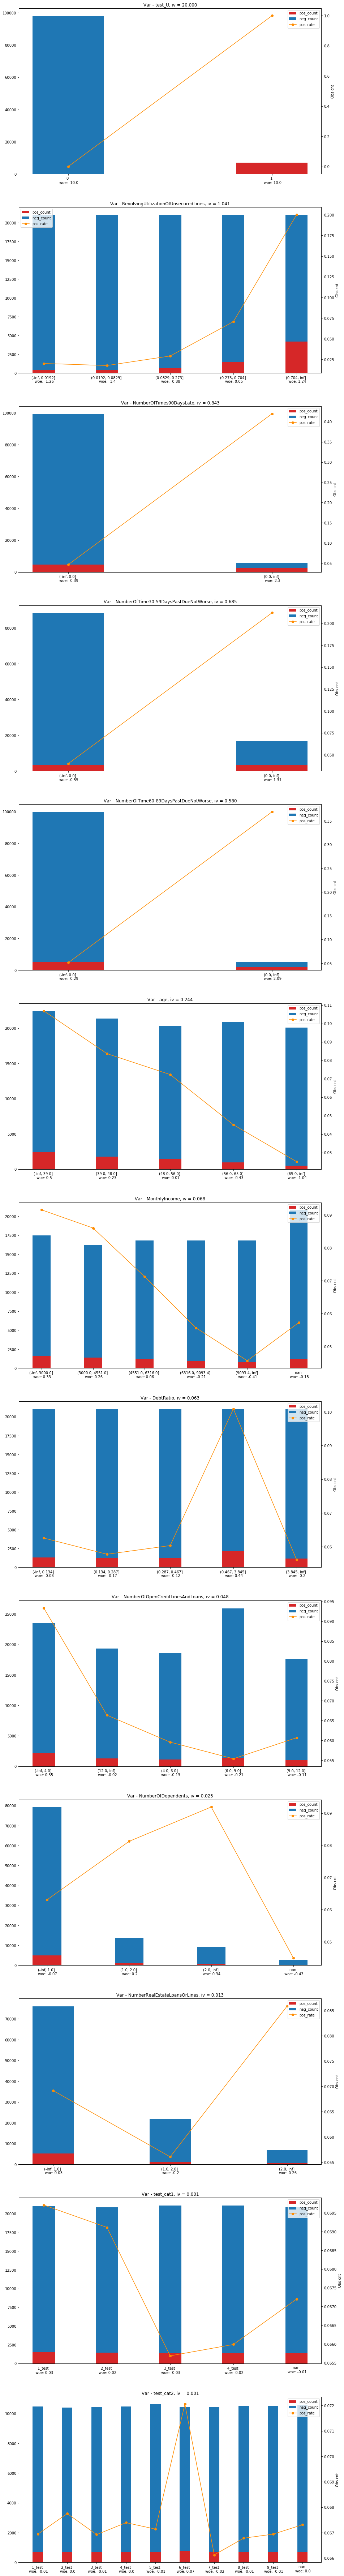

In [154]:
woe_t = ximu.woe_t
iv_t = ximu.iv_t

var_cnt = iv_t.shape[0]
woe_iv_plot,axes = plt.subplots(nrows = var_cnt,ncols = 1)
woe_iv_plot.set_size_inches(15,10 * var_cnt)
ax_cnt = 0

for i in iv_t.sort_values(by = "iv" ,ascending=False)["var_name"]:
    plt.subplot(var_cnt , 1 , ax_cnt+1)
    woe_t_sample = woe_t[woe_t["var_name"]==i]
    iv_value = iv_t[iv_t["var_name"]==i]["iv"].round(3).iloc[0]
    
    ind = np.arange(woe_t_sample.shape[0])    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
            
    p1 = plt.bar(ind, woe_t_sample["pos_count"], width, color='#d62728')
    p2 = plt.bar(ind, woe_t_sample["neg_count"], width, bottom=woe_t_sample["pos_count"])
    plt.twinx()
    p3 = plt.plot(ind,woe_t_sample["pos_count"]/woe_t_sample["cat_total_count"],'o-',color = "darkorange")
    plt.ylabel('Obs cnt')
    plt.title("Var - %s, iv = %.3f" % (i,iv_value))
    xticks = woe_t_sample["var_cat"]+" \n woe: " + woe_t_sample["woe"].round(2).astype("string")
    plt.xticks(ind, xticks)
    plt.legend((p1[0], p2[0],p3[0]), ('pos_count', 'neg_count','pos_rate'))
    re = plt.setp(axes[ax_cnt].get_xticklabels(),rotation = 30 ,horizontalalignment = "right")
    ax_cnt = ax_cnt+1

In [183]:
#排序性（提升图示例）
import math as mt
df_scored["score_rank"] = (df_scored["final_score"].rank(pct=True,ascending = False)*10).apply(mt.ceil)
df_test = pd.concat([df_scored["score_rank"],y,df_scored["final_score"]],axis = 1)
df_test_grp = df_test.groupby("score_rank")[y.name].agg([pd.Series.sum,pd.Series.count])
df_test_grp["pos_rt"] = df_test_grp["sum"] / df_test_grp["count"]
df_test_grp_2 = df_test.groupby("score_rank")["final_score"].agg([pd.Series.max,pd.Series.min])
df_test_grp_all = df_test_grp.merge(df_test_grp_2,left_index=True,right_index=True)
df_test_grp_all

,sum,count,pos_rt,max,min
score_rank,,,,,
1.0,59.0,10425.0,0.005659,672.899208,665.124496
2.0,62.0,10598.0,0.005850,665.120863,659.946885
3.0,112.0,10437.0,0.010731,659.937912,655.963984
4.0,128.0,10467.0,0.012229,655.945261,650.801206
5.0,181.0,10464.0,0.017297,650.782774,644.505749
6.0,312.0,10585.0,0.029476,644.491946,634.438530
7.0,440.0,10538.0,0.041754,634.437396,624.510209
8.0,751.0,10460.0,0.071797,624.501771,610.740691
9.0,1232.0,10543.0,0.116855,610.708590,581.075812


In [175]:
iv_lower_bound = 0.02
iv_upper_bound = 20

columns_iv = ximu.iv_t[(ximu.iv_t["iv"]>=iv_lower_bound) & (ximu.iv_t["iv"]<=iv_upper_bound)]["var_name"]
x = ximu.df_woe_replaced[columns_iv].drop(excluded_columns,axis = 1,errors = "ignore").reset_index(drop = True)
y = ximu.y.copy().reset_index(drop = True)
y[y==ximu.event] = 1
y[y<>ximu.event] = 0
ximu.y_event = y
x["__intercept"] = 1
ximu.model = sm.Logit(endog=y , exog=x)
ximu.model_result = ximu.model.fit()
print ximu.model_result.summary()

Optimization terminated successfully.
         Current function value: 0.185833
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104991
Method:                           MLE   Df Model:                            8
Date:                Tue, 19 Sep 2017   Pseudo R-squ.:                  0.2483
Time:                        17:46:34   Log-Likelihood:                -19512.
converged:                       True   LL-Null:                       -25957.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.7312      0.0

In [171]:
#print sm.add_constant.__doc__

ximu.model.exog


array([[-0.19686326,  0.32953008,  0.35196953, ..., -1.26176041,
         0.5015958 ,  1.        ],
       [-0.0816197 ,  0.05770192,  0.35196953, ..., -1.3957865 ,
        -0.42823694,  1.        ],
       [-0.16671642, -0.20511234, -0.01890656, ..., -1.3957865 ,
        -1.03579748,  1.        ],
       ..., 
       [ 0.43747526,  0.05770192, -0.01890656, ..., -1.26176041,
        -1.03579748,  1.        ],
       [-0.19686326, -0.17603425, -0.21143627, ...,  0.04944347,
         0.5015958 ,  1.        ],
       [-0.19686326, -0.17603425, -0.13417043, ..., -1.26176041,
        -0.42823694,  1.        ]])